In [1]:
#the data is self-created i.e dummy patient data

#Note: This python demonstration is for understanding the use of K-Modes clustering algorithm on patient data

# supress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing all required packages
import numpy as np
import pandas as pd

# Data viz lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

In [50]:

patient = pd.read_csv('/Users/pushpdeepsingh/Documents/cdc1.csv')


In [51]:
patient.head()


,No,Age,Gender,Emergency,Comorbidity,Death
0,1,23,M,0,0,0.30
1,2,56,F,1,4,0.34
2,3,89,F,1,6,0.67
3,4,85,M,0,5,0.40
4,5,45,F,0,3,0.20


In [52]:


patient.columns



Index(['No', 'Age', 'Gender', 'Emergency', 'Comorbidity', 'Death'], dtype='object')

In [53]:


# Converting age into categorical variable.



In [54]:
patient['age_bin'] = pd.cut(patient['Age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])
patient  = patient.drop('Age',axis = 1)
patient  = patient.drop('No',axis = 1)

In [55]:
patient.head()

,Gender,Emergency,Comorbidity,Death,age_bin
0,M,0,0,0.30,20-30
1,F,1,4,0.34,50-60
2,F,1,6,0.67,80-90
3,M,0,5,0.40,80-90
4,F,0,3,0.20,40-50


In [56]:


patient.shape



(55, 5)

In [57]:


patient.describe()



,Emergency,Comorbidity,Death
count,55.000000,55.000000,55.000000
mean,0.309091,2.472727,0.410000
std,0.466378,2.727464,0.229032
min,0.000000,0.000000,0.100000
25%,0.000000,0.000000,0.235000
50%,0.000000,2.000000,0.350000
75%,1.000000,4.000000,0.575000
max,1.000000,10.000000,0.970000


In [58]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Gender       55 non-null     object  
 1   Emergency    55 non-null     int64   
 2   Comorbidity  55 non-null     int64   
 3   Death        55 non-null     float64 
 4   age_bin      55 non-null     category
dtypes: category(1), float64(1), int64(2), object(1)
memory usage: 2.3+ KB


In [59]:
##Data Cleaning

In [60]:


# Checking Null values
patient.isnull().sum()*100/patient.shape[0]
# There are no NULL values in the dataset, hence it is clean.



Gender         0.0
Emergency      0.0
Comorbidity    0.0
Death          0.0
age_bin        0.0
dtype: float64

In [61]:
# Data is clean.

In [62]:
#Model Building

In [63]:
# First we will keep a copy of data
patient_copy = patient.copy()


In [64]:


from sklearn import preprocessing
le = preprocessing.LabelEncoder()
patient = patient.apply(le.fit_transform)
patient.head()



,Gender,Emergency,Comorbidity,Death,age_bin
0,1,0,0,10,1
1,0,1,4,12,4
2,0,1,6,25,7
3,1,0,5,16,7
4,0,0,3,5,3


In [65]:


# Importing Libraries

from kmodes.kmodes import KModes



In [66]:
#Using K-Mode with "Cao" initialization

In [67]:


km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(patient)



Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7, cost: 144.0
Run 1, iteration: 2/100, moves: 0, cost: 144.0


In [68]:
# Predicted Clusters
fitClusters_cao

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1], dtype=uint16)

In [69]:


clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = patient.columns



In [70]:



# Mode of the clusters
clusterCentroidsDf





,Gender,Emergency,Comorbidity,Death,age_bin
0,1,0,0,10,1
1,0,1,4,5,6


In [71]:
#Using K-Mode with "Huang" initialization

In [72]:
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(patient)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 16, cost: 145.0


In [73]:
# Predicted clusters
fitClusters_huang

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1], dtype=uint16)

In [74]:
#Choosing K by comparing Cost against each K

In [75]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters = num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(patient)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 171.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7, cost: 144.0
Run 1, iteration: 2/100, moves: 0, cost: 144.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 137.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 128.0


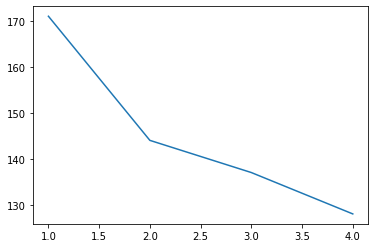

In [76]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [77]:


## Choosing K=2



In [78]:


km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(patient)



Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7, cost: 144.0
Run 1, iteration: 2/100, moves: 0, cost: 144.0


In [79]:
fitClusters_cao

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1], dtype=uint16)

In [80]:

#Combining the predicted clusters with the original DF.¶


In [81]:
patient = patient_copy.reset_index()

In [82]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([patient, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [83]:
combinedDf.head()

,Gender,Emergency,Comorbidity,Death,age_bin,cluster_predicted
0,M,0,0,0.30,20-30,0
1,F,1,4,0.34,50-60,1
2,F,1,6,0.67,80-90,1
3,M,0,5,0.40,80-90,0
4,F,0,3,0.20,40-50,1


In [84]:

#Cluster Identification¶


In [85]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]

In [86]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 0 to 53
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Gender             41 non-null     object  
 1   Emergency          41 non-null     int64   
 2   Comorbidity        41 non-null     int64   
 3   Death              41 non-null     float64 
 4   age_bin            41 non-null     category
 5   cluster_predicted  41 non-null     uint16  
dtypes: category(1), float64(1), int64(2), object(1), uint16(1)
memory usage: 2.1+ KB


In [87]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 1 to 54
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Gender             14 non-null     object  
 1   Emergency          14 non-null     int64   
 2   Comorbidity        14 non-null     int64   
 3   Death              14 non-null     float64 
 4   age_bin            14 non-null     category
 5   cluster_predicted  14 non-null     uint16  
dtypes: category(1), float64(1), int64(2), object(1), uint16(1)
memory usage: 994.0+ bytes


In [88]:
# Comorbidity

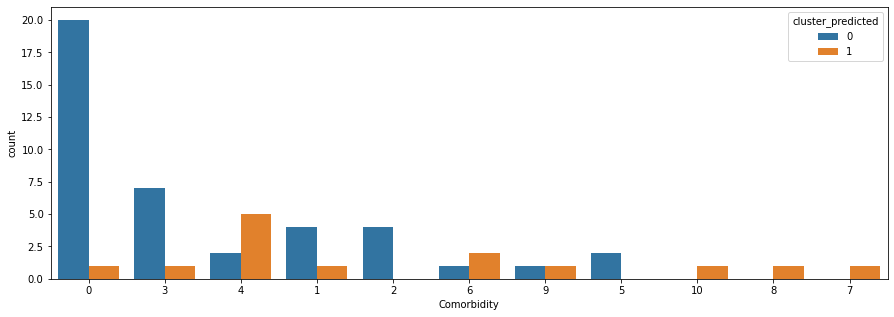

In [89]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['Comorbidity'],order=combinedDf['Comorbidity'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

In [90]:


# Emergency



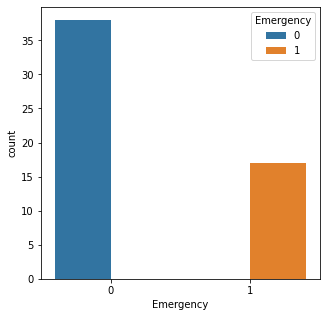

In [91]:
plt.subplots(figsize = (5,5))
sns.countplot(x=combinedDf['Emergency'],order=combinedDf['Emergency'].value_counts().index,hue=combinedDf['Emergency'])
plt.show()


In [92]:


#age_bin



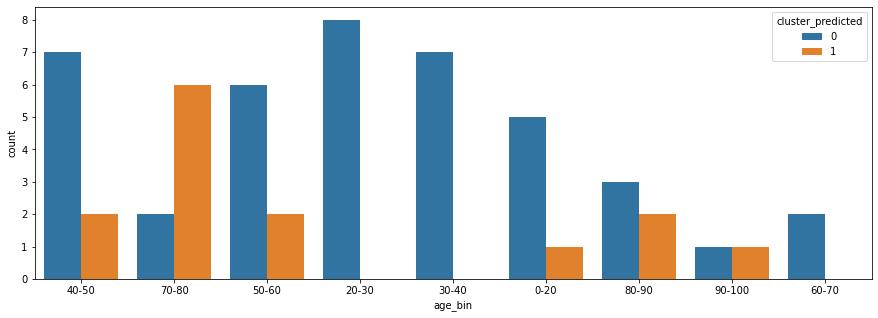

In [93]:


plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['age_bin'],order=combinedDf['age_bin'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()



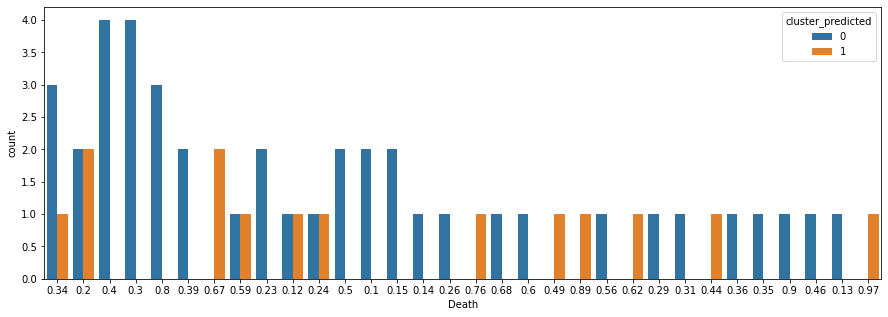

In [97]:


plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['Death'],order=combinedDf['Death'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()


In [94]:
#all plots combined


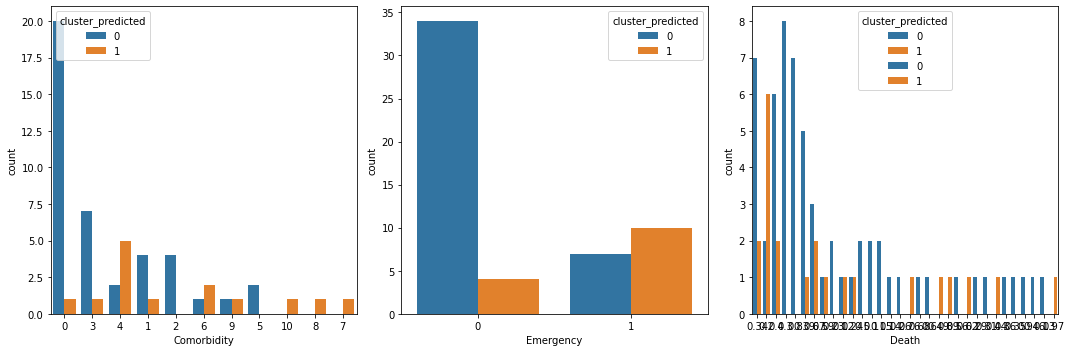

In [96]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=combinedDf['Comorbidity'],order=combinedDf['Comorbidity'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[0])
sns.countplot(x=combinedDf['Emergency'],order=combinedDf['Emergency'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[1])
sns.countplot(x=combinedDf['age_bin'],order=combinedDf['age_bin'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[2])
sns.countplot(x=combinedDf['Death'],order=combinedDf['Death'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[2])

plt.tight_layout()
plt.show()


In [98]:
combinedDf

,Gender,Emergency,Comorbidity,Death,age_bin,cluster_predicted
0,M,0,0,0.30,20-30,0
1,F,1,4,0.34,50-60,1
2,F,1,6,0.67,80-90,1
3,M,0,5,0.40,80-90,0
4,F,0,3,0.20,40-50,1
5,M,0,2,0.90,30-40,0
6,M,0,3,0.15,40-50,0
7,M,0,2,0.26,50-60,0
8,F,0,1,0.50,20-30,0
9,M,1,0,0.31,40-50,0
